In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/graduate-admissions/Admission_Predict.csv
/kaggle/input/graduate-admissions/Admission_Predict_Ver1.1.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
Reading = pd.read_csv("../input/graduate-admissions/Admission_Predict.csv")
Reading.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
Reading.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [5]:
Null = Reading.isnull()
Null.sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [6]:
Reading = Reading.rename(columns={'GRE Score': 'GRE Score', 'TOEFL Score': 'TOEFL Score', 'LOR ': 'LOR', 'Chance of Admit ': 'Admit Possibilty'})
Reading.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Admit Possibilty
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [7]:
Reading.drop('Serial No.', axis = 'columns', inplace = True)
Reading.head()


,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Admit Possibilty
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


**Visualization
**

In [8]:
gre_score = Reading[["GRE Score"]]
toefl_score = Reading[["TOEFL Score"]]
univ_rating = Reading[["University Rating"]]
admit_possibilty = Reading[["Admit Possibilty"]]

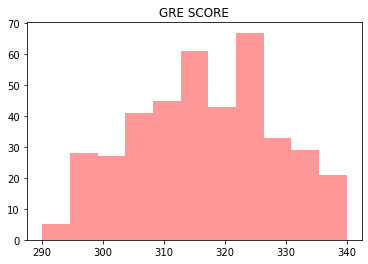

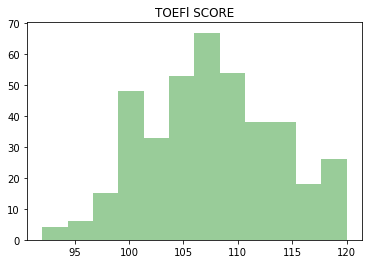

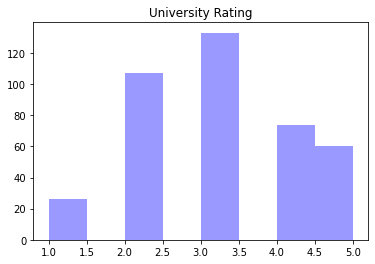

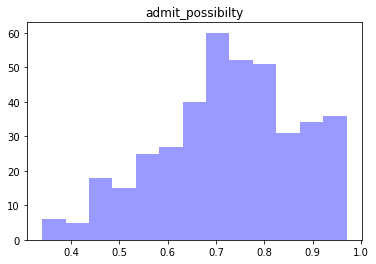

In [9]:
fig = sns.distplot(gre_score, color = 'r', kde = False)
plt.title("GRE SCORE")
plt.show()

fig = sns.distplot(toefl_score, color = 'g', kde = False)
plt.title("TOEFl SCORE")
plt.show()

fig = sns.distplot(univ_rating, color = 'b', kde = False)
plt.title("University Rating")
plt.show()

fig = sns.distplot(admit_possibilty, color = 'b', kde = False)
plt.title("admit_possibilty")
plt.show()

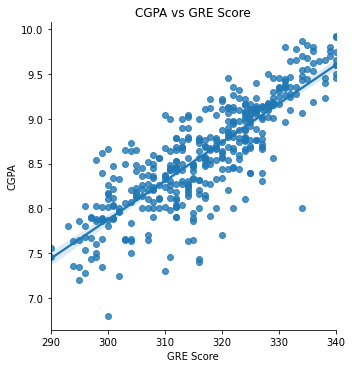

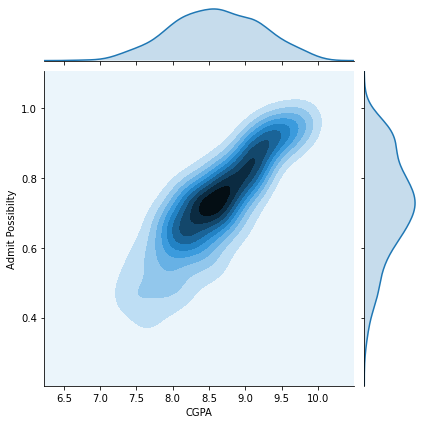

In [10]:
fig = sns.lmplot(x = 'GRE Score', y = 'CGPA', data = Reading)
plt.title("CGPA vs GRE Score")
plt.show()


fig = sns.jointplot(x = 'CGPA', y='Admit Possibilty', data=Reading, kind = 'kde')
plt.show()

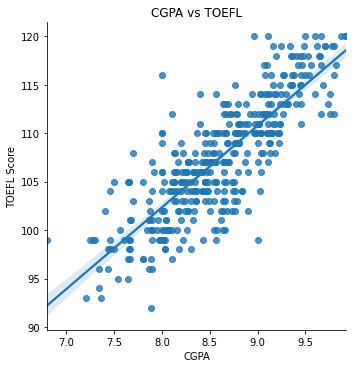

In [11]:
fig = sns.lmplot(x = 'CGPA', y = 'TOEFL Score', data = Reading)
plt.title("CGPA vs TOEFL")
plt.show()

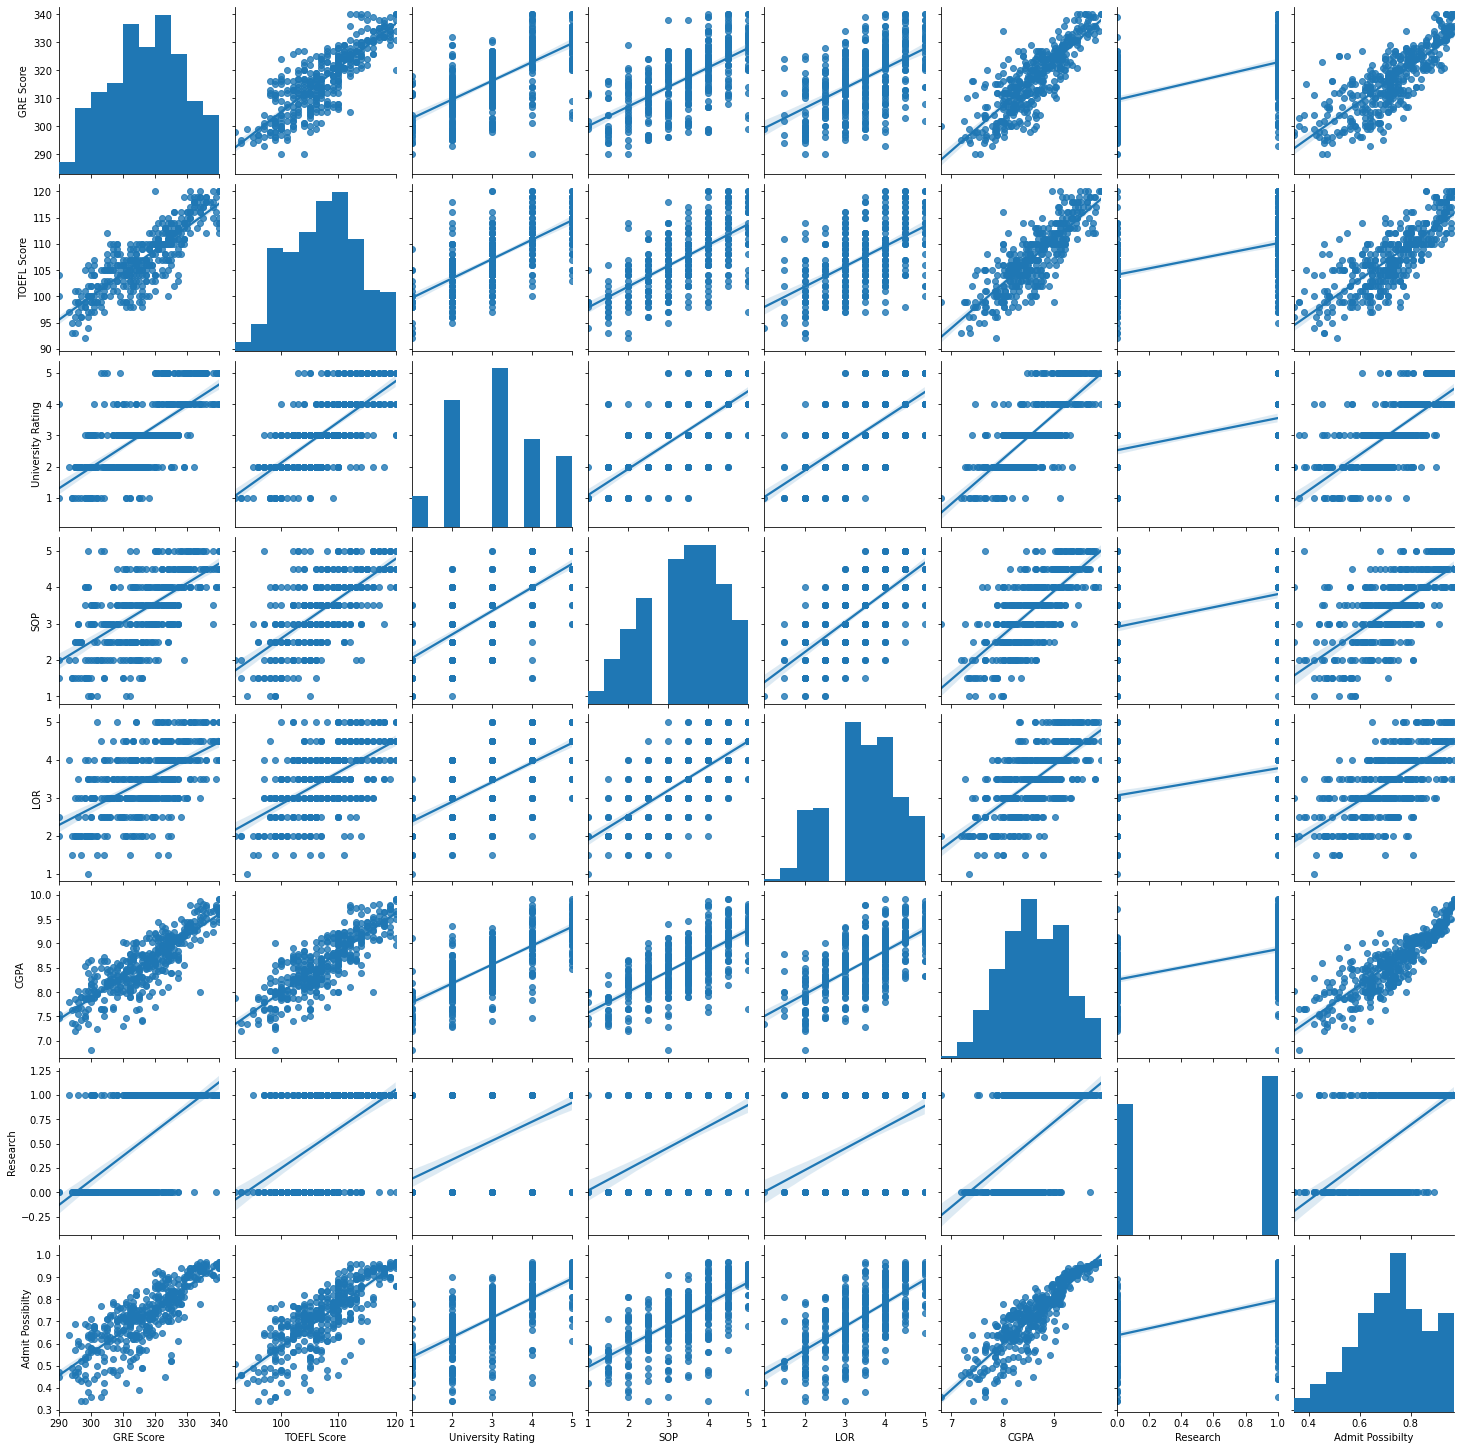

In [12]:
fig = sns.pairplot(Reading, kind = "reg")
plt.show()

***GRE and TOEFL scores have the most impact on admission possibility***

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

In [14]:
x=Reading.drop('Admit Possibilty',axis='columns')
y=Reading['Admit Possibilty']
x_train,x_test,y_train,y_test = train_test_split(x, y)

In [15]:
x_train.shape


(300, 7)

In [16]:
x_test.shape

(100, 7)

In [17]:
y_train.shape

(300,)

In [18]:
y_test.shape

(100,)

In [19]:
linear_regression = LinearRegression()
linear_regression = linear_regression.fit(x_train, y_train )

In [20]:
def get_cv_scores(linear_regression):
    scores = cross_val_score(linear_regression, x_train, y_train, cv = 5, scoring = 'r2')
    print('CV Mean: ', np.mean(scores))
    print('STD: ', np.std(scores))
    print('\n')
get_cv_scores(linear_regression)

CV Mean:  0.768783974232478
STD:  0.042684483083832506




**The model is performing on training set**

In [21]:
model = LinearRegression(normalize = True)
model.fit(x_test, y_test)
model.score(x_test, y_test)

0.8542489551329318

In [22]:
print('The chance of you getting an admit in the US is {}%'.format(round(model.predict([[305, 108, 4, 4.5, 4.5, 8.35, 0]])[0]*100, 1)))

The chance of you getting an admit in the US is 69.1%
